#Estadistica Aplicada

##Sesion 22, 25 de octubre

###Ivanna Lizeth Rodriguez Ambriz
###1899843
Grupo 41

In [1]:
#basicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#especializadas
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict

#arima
from statsmodels.tsa.arima.model import ARIMA

##
import pmdarima as pm

In [3]:
##datos
desempleo_mex=pd.read_excel('desempleo_mex.xlsx')

In [4]:
desempleo_mex.head()

,meses,tasa de desempleo
0,2005/01,3.951998
1,2005/02,3.773302
2,2005/03,3.627075
3,2005/04,3.363412
4,2005/05,3.303693


In [5]:
desempleo_mex.dtypes

meses                 object
tasa de desempleo    float64
dtype: object

In [6]:
desempleo_mex.isnull().sum()

meses                0
tasa de desempleo    0
dtype: int64

In [7]:
##convertir en tiempo

desempleo_mex['meses']=pd.to_datetime(desempleo_mex['meses'], format='%Y/%m')

In [8]:

desempleo_mex = desempleo_mex.set_index('meses')
desempleo_mex = desempleo_mex.asfreq('MS')

In [9]:
desempleo_mex.index

DatetimeIndex(['2005-01-01', '2005-02-01', '2005-03-01', '2005-04-01',
               '2005-05-01', '2005-06-01', '2005-07-01', '2005-08-01',
               '2005-09-01', '2005-10-01',
               ...
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01'],
              dtype='datetime64[ns]', name='meses', length=224, freq='MS')

Text(0.5, 1.0, 'Tasa de desempleo en México 2005-2023')

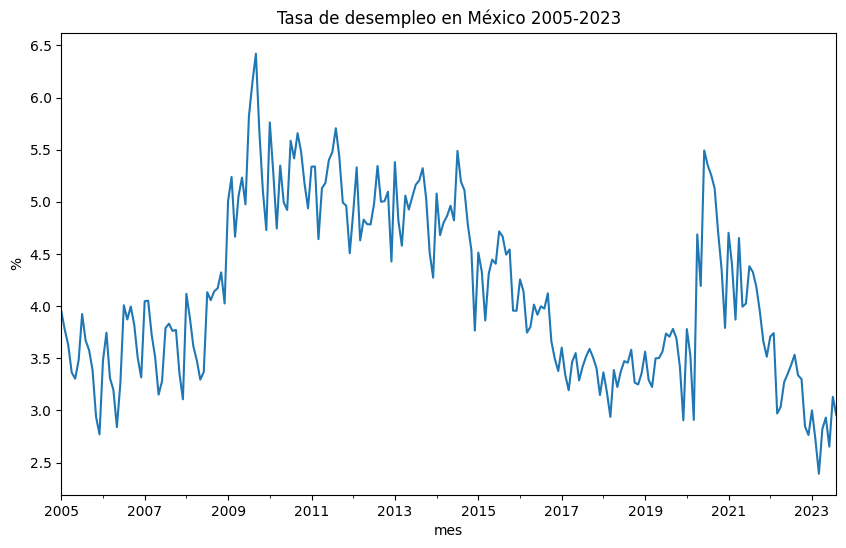

In [10]:
##graficar
desempleo_mex['tasa de desempleo'].plot(figsize=(10,6))
plt.xlabel('mes')
plt.ylabel('%')
plt.title('Tasa de desempleo en México 2005-2023')

In [11]:
#Prueba dickey fuller
prueba_adf=adfuller(desempleo_mex['tasa de desempleo'])
pvalue=prueba_adf[1]
pvalue.round(2)

0.25

No rechazmos H0, significa que la tasa de desempleo es un proceso no estacionario

In [12]:
#1eras diferencias

desempleo_mex['desempleo_diff']=desempleo_mex['tasa de desempleo'].diff()

<Axes: xlabel='meses'>

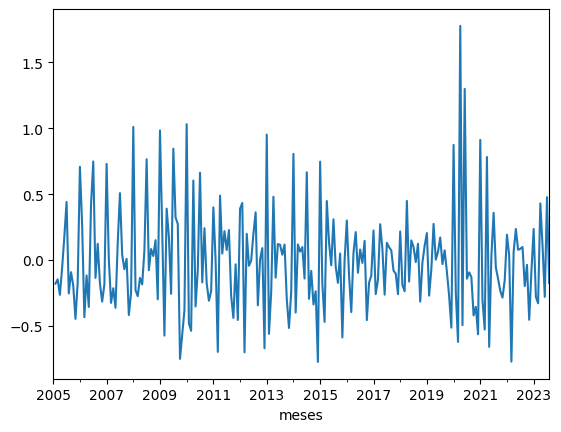

In [13]:
desempleo_mex['desempleo_diff'].plot()

In [14]:
prueba_adf1=adfuller(desempleo_mex['desempleo_diff'].dropna())
pvalue1=prueba_adf1[1]
pvalue1.round(2)

0.01

Rechazamos H0, las primeras diferencias son un proceso estacionario 

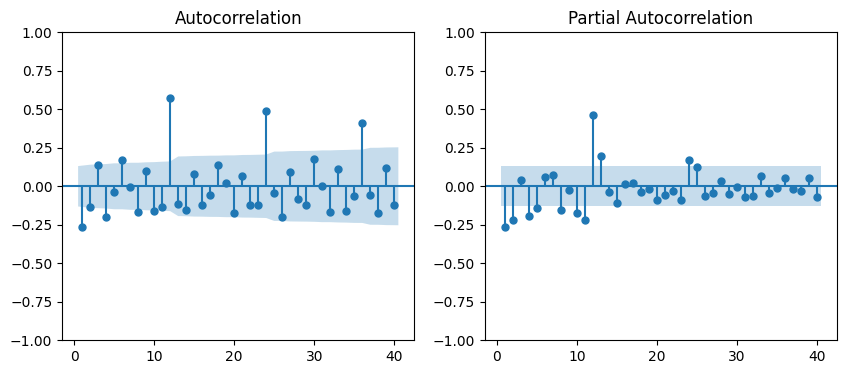

In [15]:
#que proceso estacionario es? verificamos con una grafica

ig, ax=plt.subplots(1,2, figsize=(10,4))

#1er
plot_acf(desempleo_mex['desempleo_diff'].dropna(),zero=False, lags=40, ax=ax[0])

#2do
plot_pacf(desempleo_mex['desempleo_diff'].dropna(),zero=False, lags=40, ax=ax[1])
plt.show()

#nos ayudan para observar si la serie tiene un componente estacional - subidas o caidas que repiten de la misma frecuencia

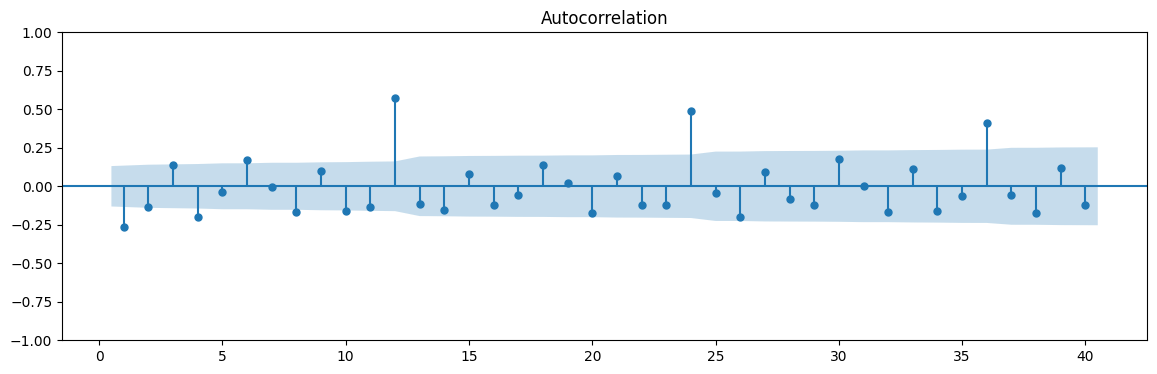

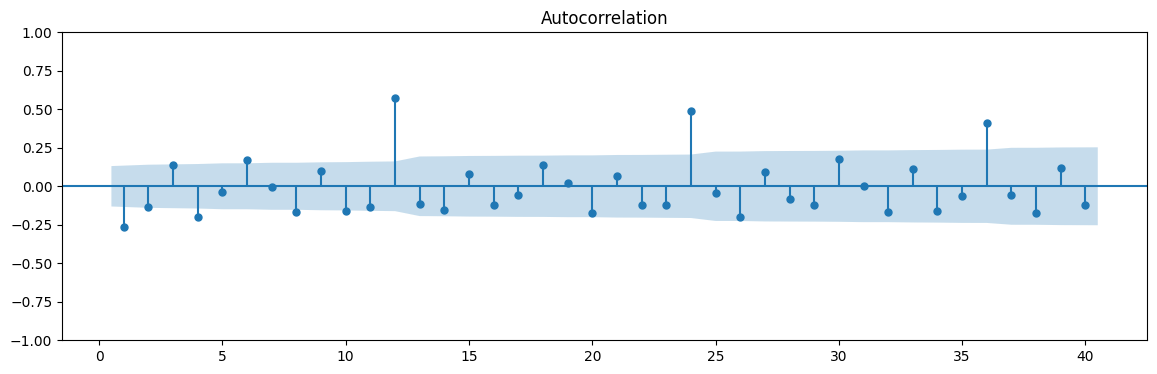

In [17]:
plt.rcParams['figure.figsize']=(14,4)
plot_acf(desempleo_mex['desempleo_diff'].dropna(),zero=False, lags=40)

El desempleo es una serie con componente estacional.

In [33]:
### determinar 
pm.auto_arima(desempleo_mex['tasa de desempleo'],
              start_p=1,start_q=1,
              max_p=7,max_q=7,
              ic='aic',
              seasonal=True,#True pq es estacionario, si es true se definen los parametros siguientes m, start_P, start_Q, max_P,mas_Q si es False no se definen
               m=12,#frecuencia de los datos
              start_P=1, start_Q=1,
              max_P=7, max_Q=7
              )

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

El desempleo es un SARIMA (1,1,0)(1,0,1,12)

In [18]:
#modelo

model=ARIMA(desempleo_mex['tasa de desempleo'],
            order=(1,1,0),
            seasonal_order=(1,0,1,12))
results=model.fit()
print(results.summary())            
            

                                     SARIMAX Results                                      
Dep. Variable:                  tasa de desempleo   No. Observations:                  224
Model:             ARIMA(1, 1, 0)x(1, 0, [1], 12)   Log Likelihood                 -28.306
Date:                            Thu, 26 Oct 2023   AIC                             64.613
Time:                                    14:24:07   BIC                             78.241
Sample:                                01-01-2005   HQIC                            70.115
                                     - 08-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3689      0.061     -6.075      0.000      -0.488      -0.250
ar.S.L12       0.9763      0.014   

(0.0, 7.0)

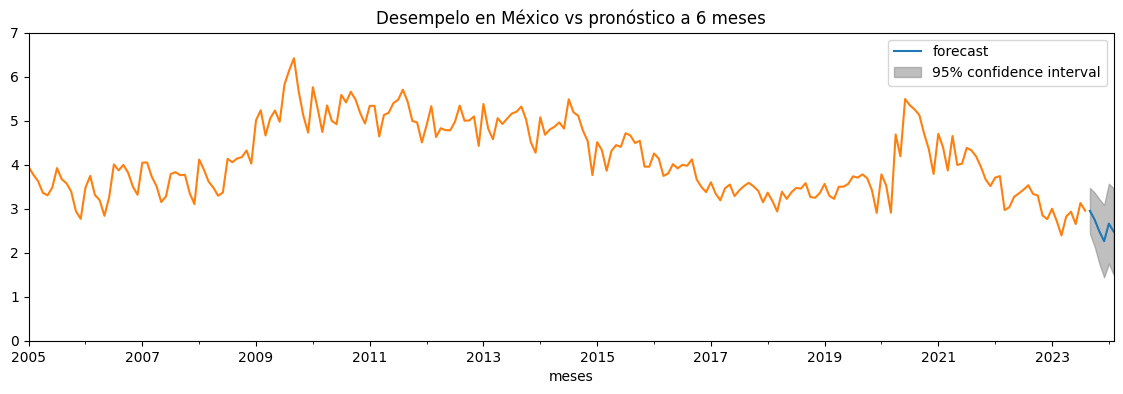

In [21]:
#pronostico
plot_predict(results,'2023-09-01','2024-02-01')
desempleo_mex['tasa de desempleo'].plot()
plt.title('Desempelo en México vs pronóstico a 6 meses')
plt.ylim(0,7)

In [19]:
#los datos llegan hasta agoto y se empiezan a pronosticar en septiembre, porque agosto ya sabemos su valor, por eso es el siguinete.
desempleo_mex.tail() #esto fue para definir el grafico de arriba

,tasa de desempleo,desempleo_diff
meses,,
2023-04-01,2.822799,0.430258
2023-05-01,2.931125,0.108327
2023-06-01,2.652033,-0.279093
2023-07-01,3.129870,0.477837
2023-08-01,2.955346,-0.174524


In [22]:
results.predict('2023-09-01','2024-02-01')

2023-09-01    2.951735
2023-10-01    2.750669
2023-11-01    2.483561
2023-12-01    2.262441
2024-01-01    2.661989
2024-02-01    2.481788
Freq: MS, Name: predicted_mean, dtype: float64

In [25]:
forecast=results.get_forecast(steps=6)
forecast_mean=forecast.predicted_mean
forecast_ci=forecast.conf_int()

In [ ]:
inicio='2023-09-01'
fin='2024-02-01'

In [27]:
pronostico_valor=forecast_mean[inicio:fin]
pronostico_intervalos=forecast_ci.loc[inicio:fin]

In [30]:
results.predict('2023-09-01','2024-02-01'), pronostico_valor

(2023-09-01    2.951735
 2023-10-01    2.750669
 2023-11-01    2.483561
 2023-12-01    2.262441
 2024-01-01    2.661989
 2024-02-01    2.481788
 Freq: MS, Name: predicted_mean, dtype: float64,
 2023-09-01    2.951735
 2023-10-01    2.750669
 2023-11-01    2.483561
 2023-12-01    2.262441
 2024-01-01    2.661989
 2024-02-01    2.481788
 Freq: MS, Name: predicted_mean, dtype: float64)

In [33]:
df_pronostico=pd.DataFrame({
    'pronóstico':pronostico_valor,
    'limite inferior': pronostico_intervalos.iloc[:,0],
    'limite superior':pronostico_intervalos.iloc[:,1]

})

In [34]:
df_pronostico

,pronóstico,limite inferior,limite superior
2023-09-01,2.951735,2.431389,3.472082
2023-10-01,2.750669,2.135374,3.365963
2023-11-01,2.483561,1.750114,3.217009
2023-12-01,2.262441,1.439566,3.085317
2024-01-01,2.661989,1.754471,3.569507
2024-02-01,2.481788,1.498252,3.465324


In [38]:
print(f'La tasa de desempleo pronosticada para septiembre del 2023 es {df_pronostico.iloc[0,0].round(2)}%\n pero puede estar entre {df_pronostico.iloc[0,1].round(2)}% y {df_pronostico.iloc[0,2].round(2)}%')

La tasa de desempleo pronosticada para septiembre del 2023 es 2.95%
 pero puede estar entre 2.43% y 3.47%
